In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_ind
from subprocess import check_output

C:\Users\703230525\Appdata\Local\Continuum\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\703230525\Appdata\Local\Continuum\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Are the amounts of sugar in cold cereal and hot cereal related?

In [3]:
cereal = pd.read_csv("cereal.csv")
cereal.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
cereal.shape

(77, 16)

In [5]:
hot_cereal = cereal.loc[cereal["type"] == 'H', : ]
cold_cereal = cereal.loc[cereal["type"] == 'C', : ]

In [8]:
ttest_ind(cold_cereal["sugars"],hot_cereal["sugars"],equal_var= False)

Ttest_indResult(statistic=4.994846451755555, pvalue=0.01874372013190692)

In [9]:
ttest_ind(cold_cereal["calories"],hot_cereal["calories"],equal_var= False)

Ttest_indResult(statistic=3.1070612896033047, pvalue=0.002691710812554955)

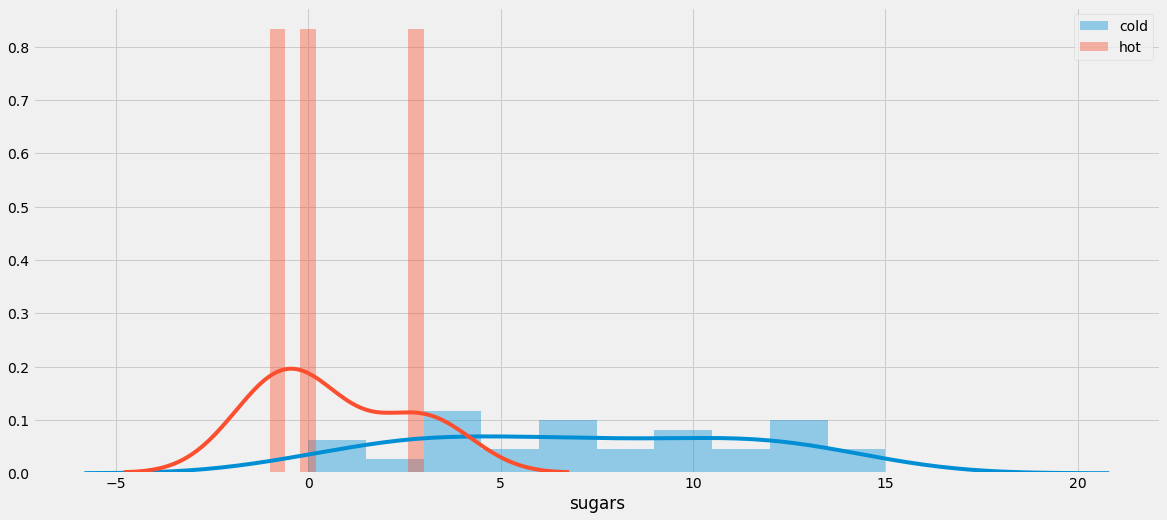

In [13]:
ax = plt.subplots(figsize=(18,8))
sns.distplot(cold_cereal["sugars"],bins=10, hist = True, label="cold")

sns.distplot(hot_cereal["sugars"],bins=10, hist = True, label="hot")
plt.legend()

# Hypothesis testing part 2

In [14]:
my_data = pd.read_csv("hypothesis_testing.csv")
my_data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [15]:
current = my_data["Current"]
new = my_data["New"]

In [20]:
ttest_ind(current, new)

Ttest_indResult(statistic=1.3283615935245678, pvalue=0.18793228491854663)

In [23]:
from statsmodels.stats import weightstats as stests
ztest , pval1 = stests.ztest(current, x2=new, value=0, alternative='two-sided')

print(float(pval1))

0.18405868087594723
